In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data=pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [3]:
data.shape

(267, 9)

In [4]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [5]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [6]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
data.duplicated().any()

False

In [8]:
data.Region.value_counts()

Region
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

In [9]:

data.columns=['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']

In [10]:
data.tail()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [11]:
data['date']=pd.to_datetime(data['date'],dayfirst=True)

In [12]:
data['month_int']=data['date'].dt.month
data.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5


<Axes: >

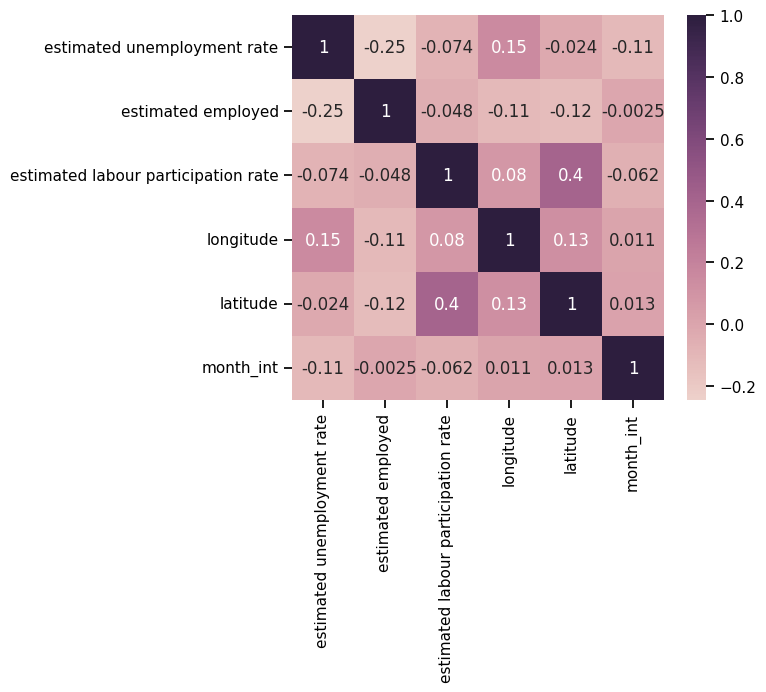

In [13]:
heatmap= data[['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate', 'longitude', 'latitude', 'month_int']]
heatmap = heatmap.corr()
plt.figure(figsize=(6,5))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=heatmap, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

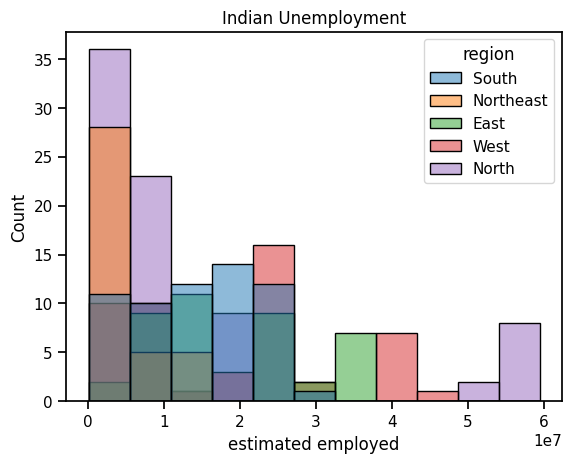

In [14]:
#The estimated number of employees according to different regions of India:
data.columns= ["state","date","frequency",
               "estimated unemployment rate","estimated employed",
               "estimated labour participation rate","region",
               "longitude","latitude","month_int"]
plt.title("Indian Unemployment")
sns.histplot(x="estimated employed", hue="region", data=data)
plt.show()

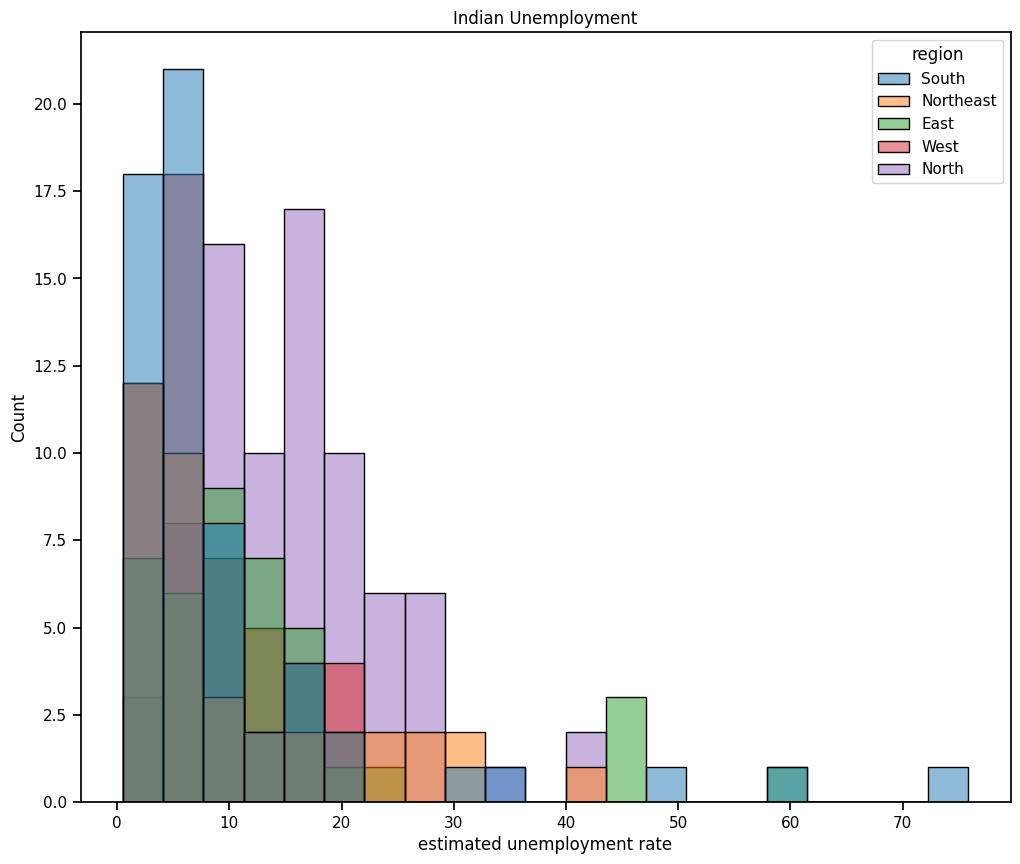

In [15]:
#The unemployment rate according to different regions of India:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="estimated unemployment rate", hue="region", data=data)
plt.show()

In [16]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [17]:
#Boxplot of Unemployment rate per States
fig = px.box(data, x='state', y='estimated unemployment rate', color='state', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [18]:
#Scatter matrix showing relationships between unemployment rate, employment, and labor participation rate, color-coded by region.
fig = px.scatter_matrix(data, template='plotly',
                        dimensions=['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate'],
                        color='region')
fig.show()


In [19]:
plot_ump = data[['estimated unemployment rate', 'state']]
data_unemp = plot_ump.groupby('state').mean().reset_index()
data_unemp = data_unemp.sort_values('estimated unemployment rate')
fig = px.bar(data_unemp, x='state', y='estimated unemployment rate', color='state',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

In [20]:
unemploment = data[["state", "region", "estimated unemployment rate"]]
figure = px.sunburst(unemploment, path=["region", "state"], 
                     values="estimated unemployment rate", 
                     width=700, height=700, color_continuous_scale="", 
                     title="Unemployment Rate in India")
figure.show()

In [21]:
fig = px.scatter_geo(data,'longitude', 'latitude', color="region",
                     hover_name="state", size="estimated unemployment rate",
                     animation_frame="month_int",scope='asia',template='plotly',title='Impact of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()


In [22]:
after_lockdown = data[(data['month_int'] >= 4) & (data['month_int'] <=6)]
before_lockdown = data[(data['month_int'] >= 1) & (data['month_int'] <=4)]

In [23]:
af_lockdown=after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown= before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['estimated unemployment rate']

lockdown.columns=['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,9.4025,13.750000
1,Assam,6.2250,7.070000
2,Bihar,20.7425,36.806667
3,Chhattisgarh,7.2450,9.380000
4,Delhi,17.6975,25.713333


In [24]:
lockdown['rate change in unemployment']=round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']
                                             /lockdown['unemployment rate after lockdown'],2)

In [25]:
import plotly.express as px

fig = px.bar(lockdown, x='state', y='rate change in unemployment', color='rate change in unemployment',
             title='Percentage change in unemployment rate in each state after lockdown', template='ggplot2')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()